In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Cats and Dog 실습

출처: https://github.com/Youngpyoryu/SD_academy/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D/%EC%8B%9C%EA%B0%81%EC%9D%B8%EC%A7%80/Convolution_Neural_Networks.ipynb


In [2]:
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats.zip"

In [ ]:
!unzip /content/train.zip

In [ ]:
!unzip /content/test1.zip

훈련, 검증, 테스트 폴더로 이미지 복사하기

In [5]:
#훈련,검증,테스트 폴더로 이미지 복사하기.
import os,shutil
#os : operation system / 운영체제와의 상호작용을 돕는 다양한 기능을 제공.
#참고 : https://docs.python.org/ko/3/library/os.html?highlight=os#module-os
#shutil : 파일,복사 etc
#참고 : https://docs.python.org/ko/3/library/shutil.html


original_dataset_dir = '/content/train' # 원본 데이터셋을 압축 해제한 디렉터리 경로

base_dir = '/content/cats_and_dogs_small' #소규모 데이터셋을 저장할 디렉터리.
os.mkdir(base_dir) #making dictory

In [6]:
train_dir = os.path.join(base_dir,'train') # /content/cats_and_dogs_small/train
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation') #/content/cats_and_dogs_small/validation
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test') #/content/cats_and_dogs_small/test
os.mkdir(test_dir)
#훈련,검증, 테스트 분할을 위한 디렉토리.

In [7]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
#훈련용 고양이 사진 디렉토리

train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)
#훈련용 강아지 사진 디렉토리

In [8]:
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
#검증용 고양이 사진 디렉토리

validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)
#검증용 강아지 사진 디렉토리

In [9]:
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
#테스트용 고양이 사진 디렉토리

test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)
#테스트용 강아지 사진 디렉토리

고양이 사진에 대한 것

In [10]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
# 처음 1000개의 고양이 이미지를 train_cats_dir에 복사

for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dst)

In [11]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
# 다음 500개의 고양이 이미지를 validation_cats_dir에 복사
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src,dst)

In [12]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)] #다음 500개의 고양이 이미지를 test_cats_dir에 복사
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_cats_dir,fname)
  shutil.copyfile(src,dst)

강아지에 대한 것

In [13]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] # 처음 1000개의 강아지 이미지를 train_cats_dir에 복사
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src,dst)

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)] # 다음 500개의 강아지 이미지를 validation_dogs_dir에 복사
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src,dst)

In [15]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)] # 다음 500개의 강아지 이미지를 test_dogs_dir에 복사
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src,dst)

In [16]:
print('훈련용 고양이 이미지 전체 개수', len(os.listdir(train_cats_dir)))
print('검증용 고양이 이미지 전체 개수', len(os.listdir(validation_cats_dir)))
print('테스트용 고양이 이미지 전체 개수', len(os.listdir(test_cats_dir)))

훈련용 고양이 이미지 전체 개수 1000
검증용 고양이 이미지 전체 개수 500
테스트용 고양이 이미지 전체 개수 500


In [17]:
print('훈련용 강아지 이미지 전체 개수', len(os.listdir(train_dogs_dir)))
print('검증용 강아지 이미지 전체 개수', len(os.listdir(validation_dogs_dir)))
print('테스트용 강아지 이미지 전체 개수', len(os.listdir(test_dogs_dir)))

훈련용 강아지 이미지 전체 개수 1000
검증용 강아지 이미지 전체 개수 500
테스트용 강아지 이미지 전체 개수 500


Locals 설명

In [18]:
x=5 # global scope

def myfunc():
    x=10 # local scope
    print(f"x inside function is {x}")

In [19]:
myfunc()

x inside function is 10


In [21]:
print(f"x outside function is {x}")

x outside function is 5


In [23]:
x=10
print(locals()['x'])

10


# 딥러닝 적용해보기

In [39]:
from keras import layers, models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [40]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])


AdaGrad는 최소값에 도달하기 전에 학습률을 0에 수렴하게 만들 수 있음.

RMSprop는 기울기를 단순 누적하지 않고 지수 가중 이동평균을 사용하여 최신 기울기들이
더 크게 반영되도록 함.

- 출처: https://light-tree.tistory.com/141

데이터 전처리
--

1. 사진을 읽습니다.

2. jpeg 콘텐츠를 RGB 픽셀 값으로 디코딩합니다.

3. 그 다음 부동 소수 타입의 텐서로 변화시킵니다.

4. 픽셀 값(0~255)의 스케일을 [0,1]로 조정
(신경망은 작은 입력값을 좋아함)

In [29]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale  = 1./255)
test_datagen = ImageDataGenerator(rescale  = 1./255)

In [30]:
train_generator = train_datagen.flow_from_directory(
    train_dir, #타깃 디렉터리
    target_size = (150,150), #모든 이미지 150X150으로 만듬
    batch_size = 20,
    class_mode = 'binary' #loss = binary_crossentropy ->이진 레이블이 필요함.
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150), #모든 이미지 150X150으로 만듬
    batch_size = 20,
    class_mode = 'binary' #loss = binary_crossentropy ->이진 레이블이 필요함.
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


파이썬 제너레이터 이해하기

yield: 함수 바깥에 전달하면서 코드 실행을 함수 바깥에 양보시킴

- 참고 링크: https://dojang.io/mod/page/view.php?id=2412


In [31]:
def generator():
  i=0
  while True:
    i +=1
    yield i

In [32]:
for item in generator():
  print(item)
  if item >4:
    break

1
2
3
4
5


In [33]:
for data_batch,labels_batch in train_generator:
  print('배치 데이터 크기',data_batch.shape)
  print('배치 레이블 크기',labels_batch.shape)
  break

배치 데이터 크기 (20, 150, 150, 3)
배치 레이블 크기 (20,)


배치 제너레이터 사용하여 모델 훈련하기
--

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 50,
    validation_data= validation_generator,
    validation_steps = 50)

In [42]:
model.save('cats_and_dogs_small_1.h5')

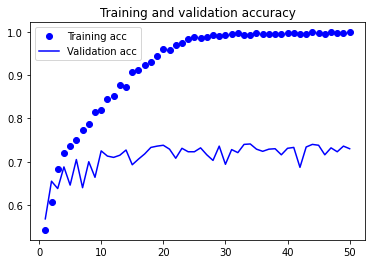

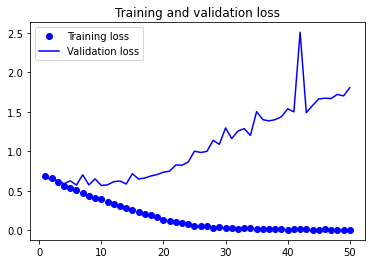

In [43]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 데이터 증식

In [44]:
datagen = ImageDataGenerator(
    rotation_range = 20, #랜덤하게 사진을 회전시킬 각도 (0~180도)
    width_shift_range = 0.1, #수평으로 랜덤하게 평행이동 시킬 범위
    height_shift_range = 0.1, #수직으로 랜덤하게 평행이동 시킬 범위
    shear_range = 0.1, #랜덤하게 전단 변환(shearing transformation)을 적용할 각도 범위 / 참고 : https://playground10.tistory.com/70
    zoom_range = 0.1, #랜덤하게 사진을 확대할 범위
    horizontal_flip = True, #랜덤하게 이미지를 수평으로 뒤집는다. 수평 대칭을 가정할 수 잇을 때 사용(ex, 풍경/인물)
    fill_mode = 'nearest' # 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략.
)

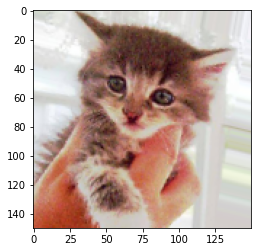

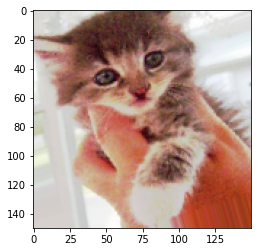

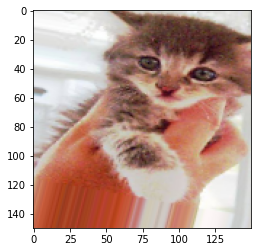

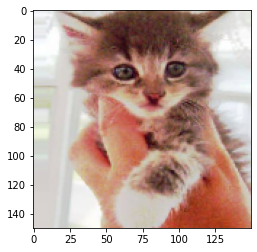

In [45]:
#랜덤하게 증식된 훈련 이미지 그리기
from keras.preprocessing import image
import matplotlib.pyplot as plt


fnames = sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size = (150,150)) # 이미지 읽고 크기를 변경.

x = image.img_to_array(img) #(150,150,3) 크기의 넘파이 배열로 변환.
x = x.reshape((1,)+x.shape) #(1,150,150,3)크기로 변환

i=0

#랜덤하게 변환됨 이미지 배치를 생성
#무한 반복되기 때무에 어느시점에서 중짐.
for batch in datagen.flow(x,batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i +=1
  if i %4 ==0:
    break
plt.show()

In [46]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.summary()
model.compile(loss = 'binary_crossentropy', optimizer= optimizers.Adam(), metrics = ['acc'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40, #랜덤하게 사진을 회전시킬 각도 (0~180도)
    width_shift_range = 0.2, #수평으로 랜덤하게 평행이동 시킬 범위
    height_shift_range = 0.2, #수직으로 랜덤하게 평행이동 시킬 범위
    shear_range = 0.2, #랜덤하게 전단 변환(shearing transformation)을 적용할 각도 범위 / 참고 : https://playground10.tistory.com/70
    zoom_range = 0.2, #랜덤하게 사진을 확대할 범위
    horizontal_flip = True, #랜덤하게 이미지를 수평으로 뒤집는다. 수평 대칭을 가정할 수 잇을 때 사용(ex, 풍경/인물)
    )
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, #타깃 디렉터리
    target_size = (150,150), #모든 이미지 150X150으로 만듬
    batch_size = 32,
    class_mode = 'binary' #loss = binary_crossentropy ->이진 레이블이 필요함.
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150), #모든 이미지 150X150으로 만듬
    batch_size = 32,
    class_mode = 'binary' #loss = binary_crossentropy ->이진 레이블이 필요함.
)
batch_size = 32
history = model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 100,
    validation_data= validation_generator,
    validation_steps = len(validation_generator))

In [48]:
model.save('cats_and_dogs_small_2.h5')

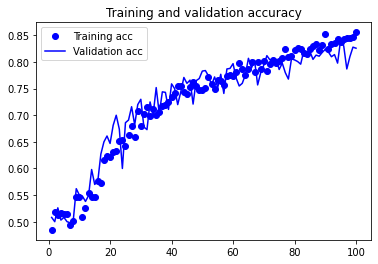

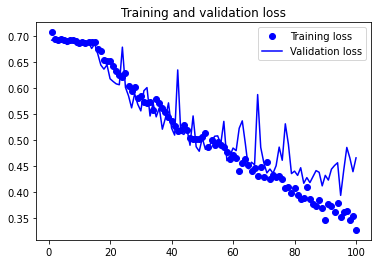

In [49]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 사전 훈련된 컨브넷 사용

- pretrained network : 대규모 이미지 분류 문제를 위해 대량의 데이터셋에서 미리 훈련되어 저장된 네트워크.

- 모델 참고: https://www.tensorflow.org/api_docs/python/tf/keras/applications


In [50]:
from tensorflow.keras.applications.vgg16 import VGG16

conv_base = VGG16(weights = 'imagenet', #weights : 모델을 초기화할 가중치 체크포인트
                  include_top = False, # 네트워크의 최상위 연결 분류기를 포함활지 안할지 지정 (기본값은 imageNet의 클래스 1,000개에 대응되는 완전 분류기를 포함)
                  #별도의 (강아지와 고양이 2개의 클래스를 구분하는 완전 연결층을 추가하려고 하므로, 이를 포함하지 않음.)
                  input_shape = (150,150,3))

58892288/58889256 [==============================] - 1s 0us/step


In [51]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

데이터 증식을 사용하지 않은 빠른 특성 추출

- ImageDataGenerator를 사용하여 이미지와 레이블을 넘파이 배열로 추출

In [52]:
#사전 훈련된 합성곱 기반 층을 사용한 특성 추출하기
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

datagen = ImageDataGenerator(rescale = 1./255)
batch_size =20

def extract_features(directory, sample_count):
  features = np.zeros(shape = (sample_count,4,4,512)) #VGG16 최종 output_size = (4,4,512)
  labels = np.zeros(shape = (sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size = (150,150),
      batch_size = batch_size,
      class_mode = 'binary')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size : (i+1) *batch_size] = features_batch
    labels[i*batch_size : (i+1) * batch_size] = labels_batch
    i +=1
    if i*batch_size >=sample_count:
      break #제너레이터는 루프 안에서 무한하게 데이터를 만들어 내므로, 모든 이미지를 한 번씩 처리하면 중지.
    return features,labels

In [53]:
train_features, train_labels = extract_features(train_dir,2000)
validation_features, validation_labels = extract_features(validation_dir,1000)
test_features, test_labels = extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


추출관 특성의 크기는 ( samples, 4, 4, 512)이다.

완전 연결 분류기에 주입하기 위해서는 먼저 (smaples, 8912)로 펼침

In [54]:
train_features = np.reshape(train_features,(2000,4*4*512))
validation_features = np.reshape(validation_features,(1000,4*4*512))
test_features = np.reshape(test_features,(1000,4*4*512))

In [55]:
train_features.shape

(2000, 8192)

In [56]:
#완전 연결 분류기를 정의하고 훈련
from keras import layers, models

model = models.Sequential()
model.add(layers.Dense(256,activation = 'relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [57]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy', optimizer= optimizers.Adam(), metrics = ['acc'])

In [ ]:
history = model.fit(train_features,train_labels,
                    epochs = 100,
                    batch_size = 20,
                    validation_data = (validation_features,validation_labels))

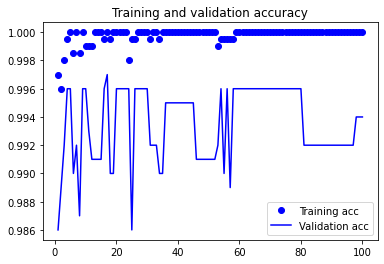

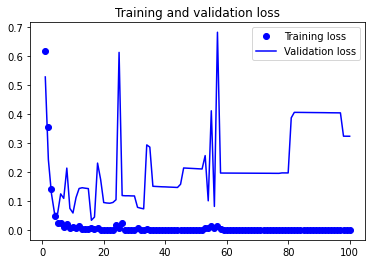

In [59]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [60]:
from keras import models,layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [61]:
model.build(input_shape = (None,150,150,3))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


모델을 컴파일하고 훈련하기 전에 합성곱 기반층을 동결하는 것이 아주 중요.하나 이상의 층을 동결한다는 것은 훈련 동안 가중치 업데이트되지 않도록 막음. 이렇게 하지 않으면 합성곱 기반층에 의해 사전에 학습된 표현이 훈련하는 동안 수정될 것 이다.

In [62]:
print('conv_base 를 동결하기 전 훈련되는 가중치의 수',len(model.trainable_weights))

conv_base 를 동결하기 전 훈련되는 가중치의 수 30


In [63]:
conv_base.trainable = False

In [64]:
print('conv_base 를 동결한후 훈련되는 가중치의 수',len(model.trainable_weights))

conv_base 를 동결한후 훈련되는 가중치의 수 4


In [65]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [66]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else : 
    layer.trainable = False

In [ ]:
model.compile(loss ='binary_crossentropy', optimizer=optimizers.Adam(), metrics = ['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 100,
    validation_data= validation_generator,
    validation_steps = len(validation_generator))

In [68]:
#model.save('cats_and dogs_small_3.h5')

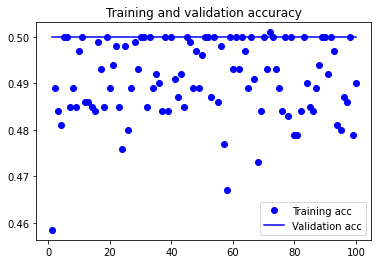

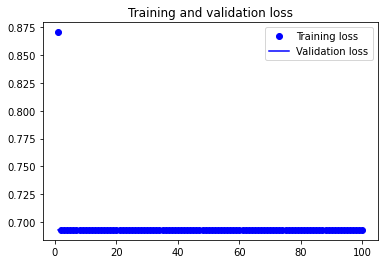

In [69]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

컨브넷의 학습 시각화(중간층만 사용)
--

In [70]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_1.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [71]:
img_path = '/content/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size = (150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis = 0)

img_tensor /=255

print(img_tensor.shape)

(1, 150, 150, 3)


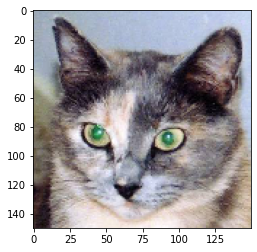

In [72]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [73]:
#입력 텐서와 출력 텐서의 리스트로 모델 객체 만들기

from keras import models

#상위 8개 층의 출력을 추출함.
layer_outputs = [layer.output for layer in model.layers[:8]]

#입력에 대해 8개 층의 출력 반환하는 모델을 만듦.
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

#입력 이미지가 주입될때 이 모델은 원본 모델의 할성화 값을 가짐.

In [74]:
acitvations = activation_model.predict(img_tensor)

In [75]:
first_layer_activation = acitvations[0]
print(first_layer_activation.shape)
#20번째 채널을 그려봄.

(1, 148, 148, 32)


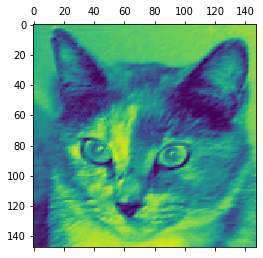

In [76]:
plt.matshow(first_layer_activation[0,:,:,19],cmap = 'viridis')
plt.show()

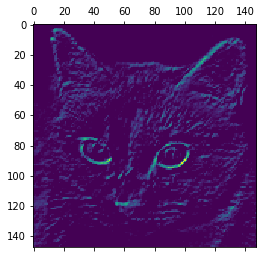

In [77]:
plt.matshow(first_layer_activation[0,:,:,16],cmap = 'viridis')
#15번째 시각화
plt.show()

중간층에 모든 활성화에 있는 채널 시각화
--

In [78]:
#층의 이름을 그래프 제목으로 사용함
layer_names = []

for layer in model.layers[:8]:
  layer_names.append(layer.name)

In [79]:
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, acitvations): #특성맵을 그림.
  n_features = layer_activation.shape[-1] #특성 맵에 있는 특성의 수

  size = layer_activation.shape[1]
  #특성 맵의 크기는 (1,size,size,n_features)

  n_cols = n_features // images_per_row #활성화 채널을 위한 그리드 크기를 구함.


  display_grid = np.zeros((size*n_cols, images_per_row *size))

  for col in range(n_cols): # 각 활성화를 하나의 큰 그리드에 채움.
    for row in range(images_per_row):
      channel_image = layer_activation[0,:,:,col*images_per_row +row]

      channel_image -=channel_image.mean() #그래프로 나타내기 좋게 특성을 처리.
      channel_image /=channel_image.std()
      channel_image *=64
      channel_image +=128
      channel_image = np.clip(channel_image,0,255).astype('uint8')
      display_grid[col*size : (col+1) * size , #그리드 출력
                   row*size : (row+1) * size] = channel_image
  
  #그리드 출력
  scale = 1./ size
  plt.figure(figsize = (scale *display_grid.shape[1],
                        scale *display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto',cmap = 'viridis')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 딥러닝 심화학습

In [80]:
import numpy as np
import pandas as pd
import zipfile
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf  

from sklearn.model_selection import train_test_split
from keras.preprocessing.image  import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.resnet50 import preprocess_input

이번엔 glob를 사용하여 zipfile을 풀어보겠습니다.

In [81]:
zip_file = glob.glob('/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats.zip')
print(zip_file)

['/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats.zip']


In [82]:
def extract_zip(file):
  with zipfile.ZipFile(file,'r') as zip_ref:
    zip_ref.extractall('temp')

#extract train and test
for files in zip_file:
  extract_zip(files)

In [83]:
batch_size = 16
img_size = 224
epochs = 30

In [85]:
print(len(os.listdir('/content/train')), 'training data') 
print(len(os.listdir('/content/test1')), 'test data')
os.listdir('/content/temp/')

25000 training data
12500 test data


['sampleSubmission.csv', 'test1.zip', 'train.zip']

Data Formatting

In [87]:
def gen_label(directory):
  label = []
  for file in os.listdir(directory):
    if (file.split('.')[0] == 'dog'):
      label.append(str(1))
    elif (file.split('.')[0] =='cat'):
      label.append(str(0))
  return label
def gen_path(directory):
  path = []
  for files in os.listdir(directory):
    path.append(files)
  return path

y_train = gen_label('/content/train')
X_train = gen_path('/content/train')
X_test = gen_path('/content/test1')

In [88]:
df = pd.DataFrame({'filename' : X_train,'category':y_train})

print(df.head())

       filename category
0  dog.3909.jpg        1
1  dog.7972.jpg        1
2  dog.5141.jpg        1
3  cat.5793.jpg        0
4  dog.7842.jpg        1


Text(0.5, 1.0, 'Data Distribution')

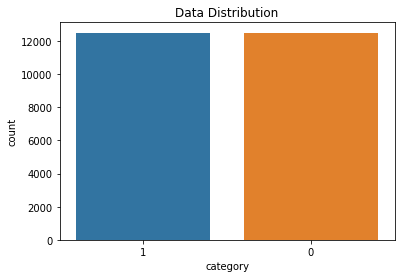

In [89]:
sns.countplot(x = 'category', data = df).set_title('Data Distribution')

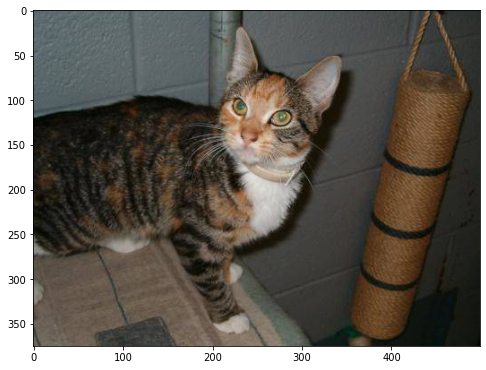

In [90]:
os.chdir('/content/train')

img = load_img(df['filename'].iloc[600])

plt.figure(figsize=(8,8))
plt.imshow(img)

In [91]:
df_train,df_valid = train_test_split(df, test_size = 0.25)
print(df_train.shape)
print(df_valid.shape)

(18750, 2)
(6250, 2)


In [92]:
def generate_train_batch(model):
  if model == 'resnet':
    print('resnet data')  # Specific preprossing method
    train_datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        horizontal_flip = True,
        fill_mode = 'nearest',
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        preprocess_function = preprocess_input) #preprocess_input : 단일 이미지를 로드하면 하나의 이미지 모양인(size1,size2,channel)를 얻게됨.
        # 이미지 배치를 생성하려면 추가 자원이 필요함-> (sample,size1,size2, channels) / preprcess_input 함수는 모델에 필요한 형식에
        # 이미지를 적절하게 맞추기 위한 것.
  else :  # standard Augmenatation.
    train_datagen = ImageDataGenerator(
        rotation_range = 10,
        rescale = 1./255,
        zoom_range = 0.1,
        horizontal_flip = True,
        fill_mode = 'nearest',
        width_shift_range = 0.1,
        height_shift_range = 0.1)
  if model =='vgg':
    print('vgg data') 
    train_gen = train_datagen.flow_from_dataframe(
        df_train[['filename']],
        x_col = 'filename',
        y_col = None,
        target_size = (img_size, img_size), # 224x224
        class_mode = None,
        shuffle = False
    )
  else : 
    train_gen = train_datagen.flow_from_dataframe(
        df_train,
        x_col = 'filename',
        y_col = 'category',
        target_size = (img_size, img_size), # 224x224
        class_mode = 'binary'
    )
  return train_gen  

def generate_valid_batch(model):
  if model =='resnet':
    print('resnet validation set')
    valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
  else:
    valid_datagen = ImageDataGenerator(rescale=1./255)


  valid_gen = valid_datagen.flow_from_dataframe(
      df_valid,
      x_col = 'filename',
      y_col = 'category',
      target_size = (img_size, img_size),
      batch_size = batch_size,
      class_mode = 'binary'
  )

  return valid_gen

In [93]:
train_gen = generate_train_batch('others')
valid_gen = generate_valid_batch('others')

Found 18750 validated image filenames belonging to 2 classes.
Found 6250 validated image filenames belonging to 2 classes.


Data Augmentation
--

In [94]:
#standard
visual_datagen = ImageDataGenerator(
    rotation_range = 10,
    rescale = 1./255,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest',
    width_shift_range = 0.1,
    height_shift_range = 0.1)

Found 1 validated image filenames belonging to 1 classes.


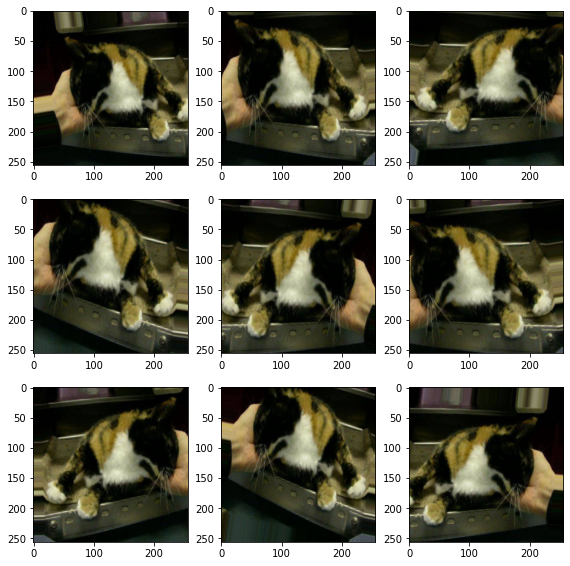

In [95]:
visualise_df = df_train.sample(n=1).reset_index(drop = True)

visualisation_generator = visual_datagen.flow_from_dataframe(
    visualise_df,
    x_col = 'filename',
    y_col = 'category' 
)
plt.figure(figsize = (8,8))
for i in range(0,9):
  plt.subplot(3,3, i+1)
  for X_batch, y_batch in visualisation_generator:
    image = X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

# CNN Architecture

In [96]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import Model, Sequential
from keras import optimizers,regularizers
from keras import backend as K
import tensorflow as tf

In [97]:
modelcnn = Sequential()
modelcnn.add(Conv2D(16,(3,3), activation= 'relu', input_shape = (img_size,img_size,3)))
modelcnn.add(Conv2D(16,(3,3),activation = 'relu'))
modelcnn.add(MaxPool2D(2,2))


modelcnn.add(Conv2D(32,(3,3), activation= 'relu'))
modelcnn.add(Conv2D(32,(3,3),activation = 'relu'))
modelcnn.add(MaxPool2D(2,2))


modelcnn.add(Conv2D(64,(3,3), activation= 'relu'))
modelcnn.add(Conv2D(64,(3,3),activation = 'relu'))
modelcnn.add(MaxPool2D(2,2))
modelcnn.add(Dropout(0.2))

modelcnn.add(Conv2D(64,(3,3), activation= 'relu'))
modelcnn.add(MaxPool2D(2,2))

modelcnn.add(Flatten())
modelcnn.add(Dense(512, activation='relu'))
modelcnn.add(Dropout(0.5))
modelcnn.add(Dense(1, activation='sigmoid'))


modelcnn.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = optimizers.Adam(),
                 metrics = ['acc'])
modelcnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 220, 220, 16)      2320      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 108, 108, 32)      4640      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 32)      9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 51, 51, 64)       

In [100]:
modelcnn.fit_generator(train_gen,
                       epochs = 5,
                       validation_data = valid_gen)

Epoch 1/5
586/586 [==============================] - 232s 396ms/step - loss: 0.6932 - acc: 0.4981 - val_loss: 0.6932 - val_acc: 0.4992
Epoch 2/5
586/586 [==============================] - 232s 397ms/step - loss: 0.6932 - acc: 0.4979 - val_loss: 0.6932 - val_acc: 0.4992
Epoch 3/5
586/586 [==============================] - 232s 397ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.4992
Epoch 4/5
586/586 [==============================] - 231s 394ms/step - loss: 0.6932 - acc: 0.4975 - val_loss: 0.6932 - val_acc: 0.5008
Epoch 5/5
586/586 [==============================] - 232s 397ms/step - loss: 0.6932 - acc: 0.4991 - val_loss: 0.6932 - val_acc: 0.4992


Transfere learning
--

전이 학습-> pretrained model

In [101]:
vgg = VGG16(weights = 'imagenet',
            include_top = False,
            input_shape = (224,224,3))
for layers in vgg.layers:
  layers.trainable = False


h5 file ->pretrain model

imagenet ->class 1000개 이미지를 학습한 weight ->.h5

In [102]:
feature_list = []
for path in df_train['filename'].to_numpy():
  x = load_img(path,target_size = (img_size,img_size))
  img_array = img_to_array(x)
  img_array = np.expand_dims(img_array,axis =0)
  features = vgg.predict(img_array)
  feature_list.append(features)

feat_lst = np.reshape(feature_list, (-1,7*7*512))

In [103]:
del feature_list

Logistic Regression
--

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = df_train['category'].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(feat_lst, y, test_size = 0.2, random_state = 42)

glm = LogisticRegression(C=0.1)
glm.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Fine Turning-> Resnet +fully Connected
--

In [108]:
#np.random.seed(2020)
#
#res = ResNet50(weights = 'imagenet',
#                      include_top = False,
#                      input_shape = (224,224,3))
#res_train_gen = generate_train_batch('resnet')
#res_valid_gen = generate_valid_batch('resnet')
#
#
#for layer in res.layer[:171]:
#  layer.trainable = False
#
#
#flat = Flatten()(res.output)
#dense = Dense(91024,activation = 'relu')(falt)
#drop  = Dropout(0.5)(dense)
#classifier = Dense(1, activation = 'sigmoid')(drop)
#
#res_model = Model(res.input, classifier)
#res_model.compile(loss = tf.keras.losses.binary_crossentropy,
#                 optimizer = optimizers.Adam(),
#                 metrics = ['acc'])
#res_model.summary()

In [109]:
#modelcnn.fit_generator(res_train_gen,
#                       epochs = epochs,
#                       validation_data = res_valid_gen,
#                       validation_steps = res_train_gen.samples // batch_size,
#                       step_per_epoch = res_valid_gen.samples // batch_size)

In [110]:
#testdf = pd.DataFrame({'filename':X_test})
#test_sample = testdf.sample(n=12, random_state = 2021)
#
#def test_img(model,name):
#  result_lst = []
#  for path in test_sample['fliename'].to_numpy():
#    full_path = '/content/temp/test1'+path
#    x = load_img(full_path, target_size = (224,224))
#    img_array = img_to_array(x)
#    img_array = np.exapan_dims(img_array,axis =0)
#
#    if name =='vgg':
#      features = model.predict(img_array)
#      features = np.reshape(features, (-1,7*7*512))
#      result = glm.predict(features)
#    else:
#      result = model.predict(img_array)
#    
#    result = 'dog' if float(result) > 0.5 else 'cat'
#
#    result_lst.append(result)
#
#  return result_lst

In [111]:
#custom_cnn_result = test_img(modecnn,'cnn')
#vgg_result = test_img(vgg,'VGG')
#finetune_result = test_img(res_model, 'resnet')